In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
min_max=False
standard=True
## 데이터 읽어오기.
df = pd.read_csv("/content/drive/MyDrive/house_price_of_unit_area.csv")

## key말고 해당하는 value값만 추출해서 입력과 정갑 데이터 분류
dataset = df.values

In [22]:
x_data = df.copy()
y_data = x_data.pop("house price of unit area")

In [24]:
# 전체 데이터에서 학습 데이터와 검증, 테스트 데이터로 구분
X_train1, X_test, Y_train1, Y_test =train_test_split(x_data, y_data, test_size=0.3, shuffle=True)
X_train, X_valid, Y_train, Y_valid =train_test_split(X_train1, Y_train1, test_size=0.3, shuffle=True)

In [26]:
# 모델의 설정
activation=tf.keras.activations.sigmoid
input_Layer = tf.keras.layers.Input(shape=(5,))
x = tf.keras.layers.Dense(120, activation=activation)(input_Layer)
x= tf.keras.layers.Dense(100, activation=activation)(x)
x= tf.keras.layers.Dense(100, activation=activation)(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_4 (Dense)             (None, 120)               720       
                                                                 
 dense_5 (Dense)             (None, 100)               12100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23021 (89.93 KB)
Trainable params: 23021 (89.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

result=model.fit(X_train, Y_train, epochs=800, batch_size=100, validation_data=(X_valid,Y_valid))
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())

Epoch 1/800
3/3 [==============================] - 1s 103ms/step - loss: 1181.8981 - root_mean_squared_error: 34.3787 - val_loss: 185.6341 - val_root_mean_squared_error: 13.6248
Epoch 2/800
3/3 [==============================] - 0s 19ms/step - loss: 145.5058 - root_mean_squared_error: 12.0626 - val_loss: 184.9428 - val_root_mean_squared_error: 13.5994
Epoch 3/800
3/3 [==============================] - 0s 18ms/step - loss: 144.9544 - root_mean_squared_error: 12.0397 - val_loss: 188.4554 - val_root_mean_squared_error: 13.7279
Epoch 4/800
3/3 [==============================] - 0s 14ms/step - loss: 148.0025 - root_mean_squared_error: 12.1656 - val_loss: 235.8423 - val_root_mean_squared_error: 15.3572
Epoch 5/800
3/3 [==============================] - 0s 15ms/step - loss: 171.2665 - root_mean_squared_error: 13.0869 - val_loss: 188.9003 - val_root_mean_squared_error: 13.7441
Epoch 6/800
3/3 [==============================] - 0s 16ms/step - loss: 145.0938 - root_mean_squared_error: 12.0455 - 

4/4 [==============================] - 0s 3ms/step - loss: 257.9294 - root_mean_squared_error: 16.0602

 Test rmse: 16.0602


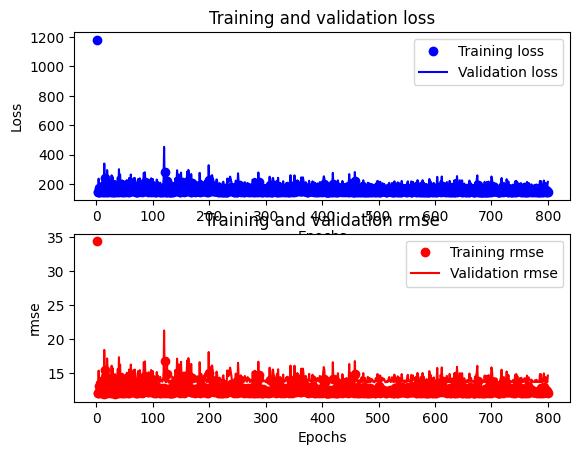

In [28]:
### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']

### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error val_root_mean_squared_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error val_mean_absolute_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(X_test, Y_test)[1]))

plt.show()